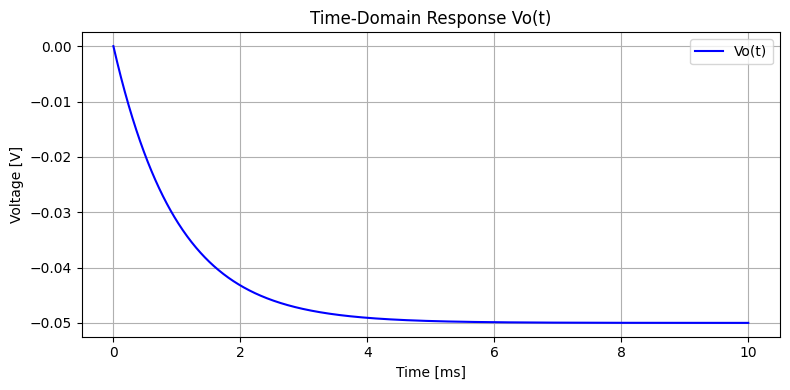

(-Va*μ + Va*μ*exp(-t/(C*R)) - Vb*μ*exp(-t/(C*R)))*Heaviside(t)

In [35]:
import sympy as sp
from sympy.abc import R, C, s, t
from sympy import symbols, inverse_laplace_transform, Heaviside

Vx, Vo, Va, Vb, Is, μ  = symbols("Vx Vo Va Vb Is μ") 

Is = (Va/s - Vb/s) / (R + 1/(C*s))
Vx = Vb/s + 1/(C*s)*Is
Vo = -μ*Vx

response = inverse_laplace_transform(Vo, s, t).expand()
response = sp.collect(response, Heaviside(t))


# Visualising the response
import numpy as np
import matplotlib.pyplot as plt
from sympy.utilities.lambdify import lambdify

# convert the symbolic response into a numerical function of t
subs = {
    Va: 5,
    Vb: 0,
    μ : 0.01,
    R : 1e3,
    C : 1e-6
}
response_num = response.subs(subs)
response_func = lambdify(t, response_num, modules=["numpy", {"Heaviside": lambda x: np.heaviside(x, 1)}])

t_vals = np.linspace(0, 0.01, 1000)
y_vals = response_func(t_vals)

plt.figure(figsize=(8,4))
plt.plot(t_vals * 1000, y_vals, label="Vo(t)", color="Blue")
plt.xlabel("Time [ms]")
plt.ylabel("Voltage [V]")
plt.title("Time-Domain Response Vo(t)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

response


In [46]:
import sympy as sp
from sympy.abc import L, R, I, s, t
from sympy import inverse_laplace_transform, symbols, Heaviside

Vo, Vx, Va, Ib, Is, μ = symbols("Vo Vx Va Ib Is μ")

Is = ((Va/s) + (L*Ib)) / (R + L*s)
Vx = Is*L*s - L*Ib
Vo = -μ*Vx

response = inverse_laplace_transform(Vo, s, t).expand()
response.collect(Heaviside(t))


(Ib*R*μ*exp(-R*t/L) - Va*μ*exp(-R*t/L))*Heaviside(t)